# Basket Analysis

In case of basket analysis, we just need the invoice data and the stock code, so we can ignore the rest. Also, we ignore the issue of returns and just lood at purchases.

In [1]:
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Import Data

In [2]:
col_types = {"Invoice": str,
             "StockCode": str,
             "Description": str,
             "Quantity": int,
             "Price": float,
             "Customer ID": str,
             "Country": str
            }

df = pd.read_csv('online_retail.csv', dtype=col_types, index_col=0)

In [3]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


### Cleaning Data

As we discovered the EDA session, there are some stock code that do not represent products. We need to clean this before process the basket analysis.

In [4]:
df['StockCode'].value_counts()

85123A       5829
22423        4424
85099B       4216
21212        3318
20725        3259
             ... 
DCGS0067        1
DCGS0066P       1
DCGS0071        1
DCGS0073        1
90197A          1
Name: StockCode, Length: 5305, dtype: int64

In [5]:
df[df['Price']<=0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.0,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.0,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.0,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.0,NaN,United Kingdom
3114,489655,20683,NaN,-44,2009-12-01 17:26:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
1062442,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom
1063965,581406,46000M,POLYESTER FILLER PAD 45x45cm,240,2011-12-08 13:58:00,0.0,NaN,United Kingdom
1063966,581406,46000S,POLYESTER FILLER PAD 40x40cm,300,2011-12-08 13:58:00,0.0,NaN,United Kingdom
1064015,581408,85175,NaN,20,2011-12-08 14:06:00,0.0,NaN,United Kingdom


- There are 6207 rows contains stock codes for something do not represent product having price <= 0. We should remove them.

In [6]:
df = df[df['Price'] > 0]
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [7]:
df['StockCode'].value_counts()

85123A    5821
22423     4408
85099B    4210
21212     3318
20725     3259
          ... 
84760L       1
16169A       1
21767        1
72754D       1
72751A       1
Name: StockCode, Length: 4932, dtype: int64

- A stock code that represent product is format as 5 digital number and with/without a letter.
- I will filter our these proper format to check the rest.

In [8]:
# define a regular expression pattern to match the desired format
pattern = r'^(?i)\d{5}[A-Z]?$'

# create a boolean mask to identify rows where stockcode does not match the desired format
mask = ~df['StockCode'].str.match(pattern)

# use the mask to filter the dataframe
result = df[mask]
result

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
89,489439,POST,POSTAGE,3,2009-12-01 09:28:00,18.00,12682.0,France
126,489444,POST,POSTAGE,1,2009-12-01 09:55:00,141.00,12636.0,USA
173,489447,POST,POSTAGE,1,2009-12-01 10:10:00,130.00,12362.0,Belgium
572,489522,79323LP,LIGHT PINK CHERRY LIGHTS,1,2009-12-01 11:45:00,6.75,15998.0,United Kingdom
613,489526,15056BL,EDWARDIAN PARASOL BLACK,6,2009-12-01 11:50:00,5.95,12533.0,Germany
...,...,...,...,...,...,...,...,...
1067002,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
1067191,581570,POST,POSTAGE,1,2011-12-09 11:59:00,18.00,12662.0,Germany
1067228,581574,POST,POSTAGE,2,2011-12-09 12:09:00,18.00,12526.0,Germany
1067229,581578,POST,POSTAGE,3,2011-12-09 12:16:00,18.00,12713.0,Germany


- Here we can see that POST is not a stockcode for products.
- Lets remove them and check the rest.

In [9]:
result[result['StockCode'] != 'POST']

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
572,489522,79323LP,LIGHT PINK CHERRY LIGHTS,1,2009-12-01 11:45:00,6.75,15998.0,United Kingdom
613,489526,15056BL,EDWARDIAN PARASOL BLACK,6,2009-12-01 11:50:00,5.95,12533.0,Germany
735,C489535,D,Discount,-1,2009-12-01 12:11:00,9.00,15299.0,United Kingdom
736,C489535,D,Discount,-1,2009-12-01 12:11:00,19.00,15299.0,United Kingdom
1762,C489588,79323GR,GREEN CHERRY LIGHTS,-2,2009-12-01 14:01:00,6.75,13711.0,United Kingdom
...,...,...,...,...,...,...,...,...
1066369,581492,DOT,DOTCOM POSTAGE,1,2011-12-09 10:03:00,933.17,NaN,United Kingdom
1066716,581495,15056BL,EDWARDIAN PARASOL BLACK,36,2011-12-09 10:20:00,5.95,14051.0,United Kingdom
1066784,581498,15056bl,EDWARDIAN PARASOL BLACK,2,2011-12-09 10:26:00,12.46,NaN,United Kingdom
1067001,581498,DOT,DOTCOM POSTAGE,1,2011-12-09 10:26:00,1714.17,NaN,United Kingdom


- Now we also see that stockcode can contain 2 letters, not one as above.
- And there are stock code like D, DOT, M are not for products.
- Now I will change the pattern in the script above to filter out stockcodes contain 5 number and 2 letters.

In [10]:
# define a regular expression pattern to match the desired format
pattern = r'^(?i)\d{5}[A-Z]?[A-Z]?$'

# create a boolean mask to identify rows where stockcode does not match the desired format
mask = ~df['StockCode'].str.match(pattern)

# use the mask to filter the dataframe
result = df[mask]
result

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
89,489439,POST,POSTAGE,3,2009-12-01 09:28:00,18.00,12682.0,France
126,489444,POST,POSTAGE,1,2009-12-01 09:55:00,141.00,12636.0,USA
173,489447,POST,POSTAGE,1,2009-12-01 10:10:00,130.00,12362.0,Belgium
625,489526,POST,POSTAGE,6,2009-12-01 11:50:00,18.00,12533.0,Germany
735,C489535,D,Discount,-1,2009-12-01 12:11:00,9.00,15299.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067002,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
1067191,581570,POST,POSTAGE,1,2011-12-09 11:59:00,18.00,12662.0,Germany
1067228,581574,POST,POSTAGE,2,2011-12-09 12:09:00,18.00,12526.0,Germany
1067229,581578,POST,POSTAGE,3,2011-12-09 12:16:00,18.00,12713.0,Germany


In [11]:
result['StockCode'].value_counts()

POST            2115
DOT             1439
M               1414
C2               279
D                177
S                104
BANK CHARGES     102
ADJUST            67
AMAZONFEE         43
DCGS0058          30
gift_0001_20      26
gift_0001_30      24
DCGSSGIRL         23
DCGSSBOY          21
PADS              18
CRUK              16
DCGS0076          15
gift_0001_10      14
TEST001           13
DCGS0003          13
gift_0001_50       6
gift_0001_40       5
m                  5
DCGS0069           5
DCGS0004           4
ADJUST2            3
DCGS0072           3
gift_0001_80       2
DCGS0066N          2
SP1002             2
DCGS0068           2
DCGS0070           2
DCGS0075           1
DCGS0041           1
gift_0001_70       1
DCGS0037           1
TEST002            1
47503J             1
DCGS0044           1
DCGS0062           1
B                  1
Name: StockCode, dtype: int64

- Now we have 6003 rows with these strange stock code. We should check all these code to know what it is but to simplify this analysis I just remove them all.

In [12]:
# Combine all stockcode that will be remove into an array
stockcode_to_remove = result['StockCode'].unique()

# Remove them from the dataframe
df = df[~df['StockCode'].isin(stockcode_to_remove)]
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067365,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


### To simplify this project, I limited the number of products down to top 100 most frequently bought products

In [20]:
top_100_products = df['Description'].value_counts().head(100).index.to_list()

In [22]:
df_top_100 = df[df['Description'].isin(top_100_products)]

In [38]:
len(df_top_100)

171918

### Now the data is clean, lets process basket analysis

### Basic idea of association rule (applied for bastket analysis)

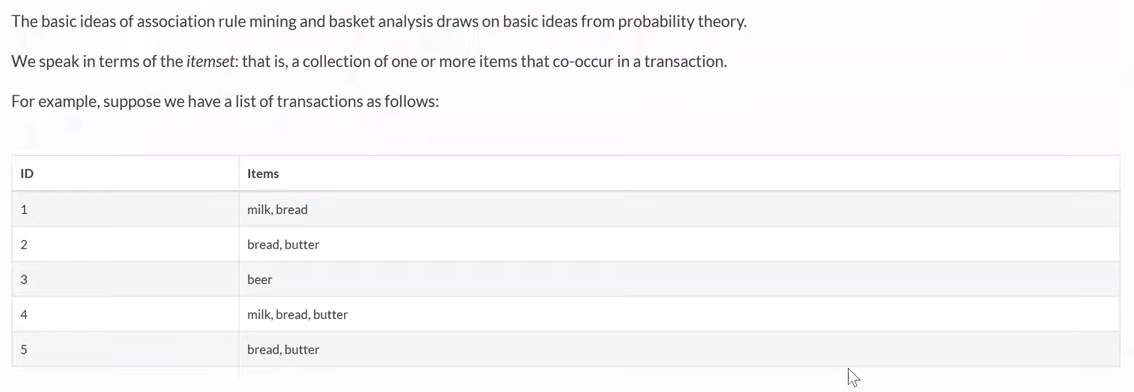

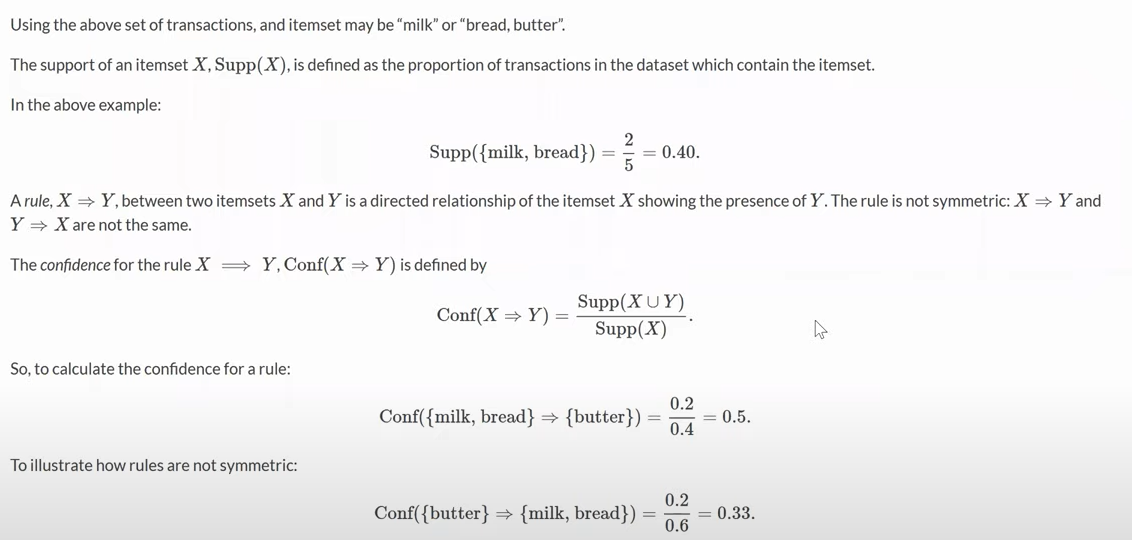

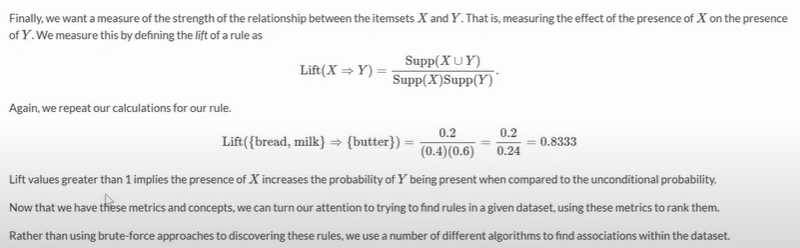

In [39]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, fpmax, fpgrowth

# Transform our transaction dataset into list, which is the desired format to use for the library
result = df_top_100.groupby('Invoice')['Description'].apply(list).tolist()

te = TransactionEncoder()
te_ary = te.fit(result).transform(result)
df_0 = pd.DataFrame(te_ary, columns=te.columns_)

# Our top 100 products dataset contains 171918 rows.
# I defined the min_support as 0.03, it means the item_sets will have to present at least 
# 0.03x171918 = 5,157 times to be considered.

frequent_itemsets = apriori(df_0, min_support=0.03, max_len=4, use_colnames=True, verbose=True)
frequent_itemsets.sort_values(by='support', ascending=False)

Processing 204 combinations | Sampling itemset size 32


,support,itemsets
95,0.178280,(WHITE HANGING HEART T-LIGHT HOLDER)
75,0.128048,(REGENCY CAKESTAND 3 TIER)
37,0.106837,(JUMBO BAG RED RETROSPOT)
5,0.091738,(ASSORTED COLOUR BIRD ORNAMENT)
61,0.087391,(PARTY BUNTING)
...,...,...
105,0.032943,"(JUMBO SHOPPER VINTAGE RED PAISLEY, JUMBO BAG ..."
102,0.032715,"(HEART OF WICKER SMALL, HEART OF WICKER LARGE)"
103,0.031571,"(JUMBO BAG RED RETROSPOT, JUMBO BAG PINK POLKA..."
100,0.030263,"(PACK OF 60 PINK PAISLEY CAKE CASES, 60 TEATIM..."


In [40]:
from mlxtend.frequent_patterns import association_rules
association_rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.5)
association_rules.sort_values(by='lift', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
2,(ROSES REGENCY TEACUP AND SAUCER ),(GREEN REGENCY TEACUP AND SAUCER),0.046081,0.043794,0.033434,0.725532,16.567034,0.031415,3.483852,0.985031
3,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.043794,0.046081,0.033434,0.763433,16.567034,0.031415,4.032337,0.982674
17,(STRAWBERRY CERAMIC TRINKET BOX),(SWEETHEART CERAMIC TRINKET BOX),0.075495,0.048435,0.034381,0.455411,9.402614,0.030725,1.747310,0.966622
16,(SWEETHEART CERAMIC TRINKET BOX),(STRAWBERRY CERAMIC TRINKET BOX),0.048435,0.075495,0.034381,0.709852,9.402614,0.030725,3.186317,0.939133
18,(WOODEN FRAME ANTIQUE WHITE ),(WOODEN PICTURE FRAME WHITE FINISH),0.067292,0.065560,0.036408,0.541039,8.252603,0.031996,2.035992,0.942231
19,(WOODEN PICTURE FRAME WHITE FINISH),(WOODEN FRAME ANTIQUE WHITE ),0.065560,0.067292,0.036408,0.555334,8.252603,0.031996,2.097547,0.940484
4,(HEART OF WICKER SMALL),(HEART OF WICKER LARGE),0.070299,0.063795,0.032715,0.465365,7.294691,0.028230,1.751110,0.928163
5,(HEART OF WICKER LARGE),(HEART OF WICKER SMALL),0.063795,0.070299,0.032715,0.512807,7.294691,0.028230,1.908283,0.921715
1,(60 TEATIME FAIRY CAKE CASES),(PACK OF 60 PINK PAISLEY CAKE CASES),0.069514,0.065135,0.030263,0.435355,6.683889,0.025736,1.655669,0.913917
0,(PACK OF 60 PINK PAISLEY CAKE CASES),(60 TEATIME FAIRY CAKE CASES),0.065135,0.069514,0.030263,0.464626,6.683889,0.025736,1.738011,0.909636


### Using this result we can marketing consequent items when customer interested in antecedent items.